In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import sklearn
from matplotlib import cm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.transforms as mtransforms

In [5]:
FONT_TITLE_PLOT = {'family': 'sans-serif', 
                   'name': 'time',
                   'color':  'black', 
                   'weight': 'normal', 
                   'size': 14} 

FONT_LABEL_PLOT = {'family': 'sans-serif', 
                   'name': 'time',
                   'color':  'black', 
                   'weight': 'normal', 
                   'size': 12} 

FONT_LEGEND_PLOT = {'family': 'sans-serif', 
                    'name': 'time',
                    'color':  'black', 
                    'weight': 'normal', 
                    'size': 12} 


# Data import and partition

The data have already been preprocessed using the matlab class PSM (using the generateExportData function).

## Preprocessed data import

In [6]:
# Load VTAs and table
table = pd.read_csv('table.csv')
data = scipy.io.loadmat('data.mat')
X = np.array(data['X'])
y = np.array(data['y'])

SHAPE = tuple(data['shape'][0, :])

## Create partitions of training and testing sets

The dataset is now split into the training and the testing set. In this script, no cross-validation will be performed.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Plot functions

Before going into the generation of the maps, this section creates function useful to observe and compare the probabilistic maps.

## Map plot

In [8]:
# Functions plot a 3D array in a well presented style
# From matplotlib-3d notebook (unknown author)

def normalize(arr):
    arr_min = np.min(arr)
    return (arr-arr_min)/(np.max(arr)-arr_min)


In [9]:
# Function used to visualize the different models

def plot_map(model, 
             dim='2D', 
             plane='axial', 
             slice_index=int(SHAPE[2]/2), 
             view_angle=320, 
             marker='dot'):
    
    coef_tensor = reconstruct(model.coef_)
    
    if dim == '2D':
        plot_slice(coef_tensor, slice_index, plane)
        
    elif dim == '3D':
        plot_cube(coef_tensor, view_angle, marker)
        
    
def reconstruct(vector):
    # Function to reconstruct a vector into tensor based on the container shape
    
    vector = vector[1:]
    tensor = np.reshape(vector, SHAPE, order='F')
    
    return tensor
    
def plot_slice(tensor, slice_index, plane):
    # Function to plot a slice of the map on a 2D figure
    
    fig = plt.figure(figsize=(10/2.54, 10/2.54))
    ax = plt.axes()
    
    if plane == 'axial':
        plt.imshow(tensor[:, :, slice_index], cmap='coolwarm')
        ax.set_xlabel('coronal', fontdict=FONT_LABEL_PLOT)
        ax.set_ylabel('sagital', fontdict=FONT_LABEL_PLOT)
        
    elif plane == 'sagital':
        plt.imshow(tensor[:, slice_index, :], cmap='coolwarm')
        ax.set_xlabel('coronal', fontdict=FONT_LABEL_PLOT)
        ax.set_ylabel('axial', fontdict=FONT_LABEL_PLOT)
        
    elif plane == 'coronal':
        plt.imshow(tensor[slice_index, :, :], cmap='coolwarm')
        ax.set_xlabel('sagital', fontdict=FONT_LABEL_PLOT)
        ax.set_ylabel('axial', fontdict=FONT_LABEL_PLOT)
        
    plt.show()

def plot_cube(cube, view_angle):

    colors = cm.viridis(cube)
    colors[:,:,:,-1] = cube

    filled = cube != 0
    xx, yy, zz = np.indices(np.array(filled.shape)+1)

    fig = plt.figure(figsize=(30/2.54, 30/2.54))
    ax = plt.axes(projection='3d')
    ax.view_init(30, view_angle)
    ax.set_xlim(right=SHAPE[0])
    ax.set_ylim(top=SHAPE[1])
    ax.set_zlim(top=SHAPE[2])

    #ax.voxels(xx, yy, zz, colors, alpha=filled)
    ax.voxels(xx, yy, zz, filled, facecolors=colors, edgecolor='k', shade=False)
    
    plt.show()

## Results plot

In [11]:
# Function used to visualize the accuracy of a model on testing and training data

def plot_results(model, X_test, y_test, X_train, y_train):
    
    pred_test = model.predict(X_test)
    pred_train = model.predict(X_train)
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Horizontally stacked subplots')
    ax1.scatter(pred_test, y_test)
    ax2.scatter(pred_train, y_train)
    
    print(R2_test)
    

### Reconstruction of a VTA

As the data (the VTA voxels values) are provided under a vectorized form, it is necessary to be able to reconstruct the map. The first feature of the matrix is the intercept term and is cannot be displayed with the rest of the map voxels.

In [12]:
VTA_vector = X[2, 1:]
VTA_tensor = np.reshape(VTA_vector, SHAPE, order='F')

plot_map(VTA_tensor, dim='3D')

AttributeError: 'numpy.ndarray' object has no attribute 'coef_'

# Probabilistic Stimulation Map for deep brain stimulation



first, I need to know wether it is a variance or a bias problem
to be assessed:
    - basic logistic regression
    - l1, l2 regularized logistic regression
    - bagging
    

## Linear regression

In [13]:
#model = LogisticRegression(C=0.1, penalty="l1", tol=0.01, solver="saga", verbose=1)

model = LinearRegression()
model = model.fit(X_train, np.squeeze(y_train.T))


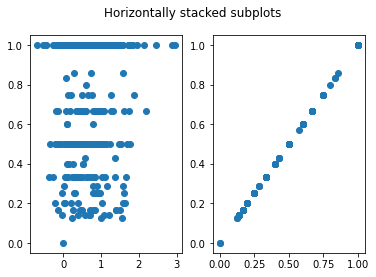

In [12]:
plot_results(model, X_test, y_test, X_train, y_train)

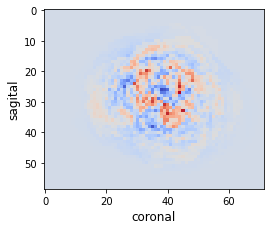

In [67]:
plot_map(model)

## Lasso regression

In [54]:
from sklearn.linear_model import Lasso

model = Lasso(alpha = 0.0001, max_iter=1e4)
model = model.fit(X_train, np.squeeze(y_train.T))

pred_test = model.predict(X_test)
pred_train = model.predict(X_train)


/home/brainstimmaps/.conda/envs/PSM/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03256863183174896, tolerance: 0.006825595915544075
  positive)


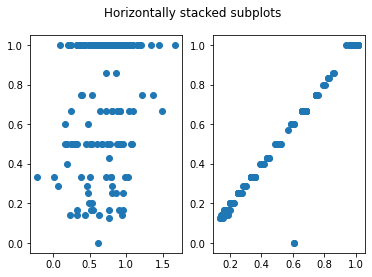

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.suptitle('Horizontally stacked subplots')
ax1.scatter(pred_test, y_test)
ax2.scatter(pred_train, y_train)

## Logistic Regression

In [45]:
from sklearn.linear_model import LinearRegression

class LogitRegression(LinearRegression):

    def fit(self, x, p):
        p = np.asarray(p)
        y = np.log(p / (1 - p))
        return super().fit(x, y)

    def predict(self, x):
        y = super().predict(x)
        return 1 / (np.exp(-y) + 1)

model = LogitRegression()
model.fit(X, np.squeeze(y.T))

<ipython-input-45-6a0f141bbd68>:7: RuntimeWarning: divide by zero encountered in true_divide
  y = np.log(p / (1 - p))
<ipython-input-45-6a0f141bbd68>:7: RuntimeWarning: divide by zero encountered in log
  y = np.log(p / (1 - p))
/home/quentin/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input contains NaN, infinity or a value too large for dtype('<f4').